<a href="https://colab.research.google.com/github/gabrielddrs/breast-cancer/blob/main/Base_Breat_Cancer_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Breast Cancer - Classificação binária com Validação cruzada

## Etapa 1 - Importação das bibliotecas

In [ ]:
!pip install -qU scikit-learn

In [ ]:
# Biblioteca para realizar a validação cruzada
!pip install -q skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
from sklearn.model_selection import cross_val_score
from skorch import NeuralNetBinaryClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/cursoDeepLearning/Deep Learing de A à Z com PyTorch.zip' -d '/content/cursoDeepLearning'

Archive:  /content/drive/MyDrive/cursoDeepLearning/Deep Learing de A à Z com PyTorch.zip
   creating: /content/cursoDeepLearning/Bases/
  inflating: /content/cursoDeepLearning/Bases/petr4_teste.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._petr4_teste.csv  
  inflating: /content/cursoDeepLearning/Bases/.DS_Store  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._.DS_Store  
  inflating: /content/cursoDeepLearning/Bases/poluicao.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._poluicao.csv  
  inflating: /content/cursoDeepLearning/Bases/personagens.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._personagens.csv  
  inflating: /content/cursoDeepLearning/Bases/autos.csv  
  inflating: /content/cursoDeepLearning/Bases/iris.csv  
  inflating: /content/cursoDeepLearning/Bases/games.csv  
  inflating: /content/cursoDeepLearning/Bases/petr4_treinamento.csv  
  inflating: /content/cursoDeepLearning/__MACOSX/Bases/._petr4_treinamento.csv  
 

## Etapa 2 - Base de Dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('/content/cursoDeepLearning/Bases/entradas_breast.csv')
classes = pd.read_csv('/content/cursoDeepLearning/Bases/saidas_breast.csv')

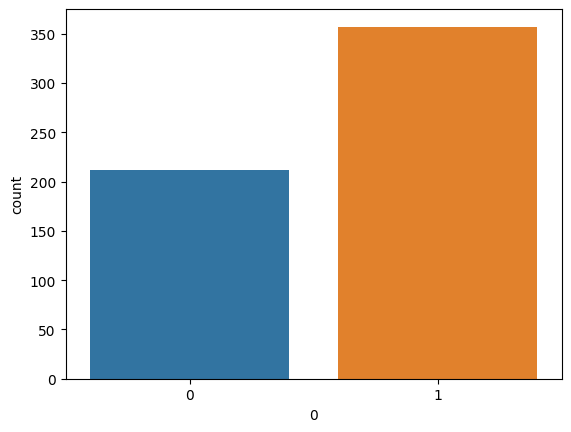

In [ ]:
sns.countplot(x=classes['0']);

In [ ]:
classes.shape

(569, 1)

In [ ]:
previsores = np.array(previsores, dtype='float32')
classes = np.array(classes, dtype='float32').squeeze(1)

In [ ]:
classes.shape

(569,)

## Etapa 3 - Classe para estrutura da rede neural

In [ ]:
# O Skorch exige que a RN seja passada por uma classe que herda da classe module do pytorch
class classificador_torch(nn.Module):

  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    # Primeira camada densa
    self.dense0 = nn.Linear(30, 16)
    # Definindo a inicialização dos pesos
    torch.nn.init.uniform_(self.dense0.weight)
    # Definindo a função de ativação
    self.activation0 = nn.ReLU()
    # Com isso, já criamos a ligação entrada com a primeira hidden layer

    # Segunda camada densa
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()

    # Terceira camada densa
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    # X = Inputs que vamos receber

    #Realizando a ligação entre as camadas
    X = self.dense0(X)
    X = self.activation0(X)

    X = self.dense1(X)
    X = self.activation1(X)

    X = self.dense2(X)
    X = self.output(X)
    return X

## Etapa 4 - Skorch

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)
# Neste caso, usamos o False no split pois faremos a separação na validação cruzada

Perceba que quando usamos o Skorch, precisamos criar dois classificadores: Torch e Skorch. Só assim ele será compatível com o Sklearn

## Etapa 5 - Validação Cruzada

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classes, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0870
      2       37.1094  0.0733
      3       37.1094  0.0716
      4       37.1094  0.0730
      5       37.1094  0.0707
      6       37.1094  0.0738
      7       37.1094  0.0830
      8       37.1094  0.0812
      9       37.1094  0.0702
     10       37.1094  0.0798
     11       37.1094  0.0727
     12       37.1094  0.0724
     13       37.1094  0.0749
     14       37.1094  0.0724
     15       37.1094  0.0738
     16       37.1094  0.0730
     17       37.1094  0.0724
     18       37.1094  0.0675
     19       37.1094  0.0744
     20       37.1094  0.0782
     21       37.1094  0.0693
     22       37.1094  0.0749
     23       37.1094  0.0703
     24       37.1094  0.0749
     25       37.1094  0.0689
     26       37.1094  0.0737
     27       37.1094  0.0741
     28       37.1094  0.0720
     29       37.1094  0.0712
     30       37.1094  0.0743
     31       37.1094  0.0702
     32   

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([0.61403509, 0.61403509, 0.85964912, 0.63157895, 0.85964912,
       0.89473684, 0.84210526, 0.89473684, 0.89473684, 0.875     ])

In [ ]:
# Média
media = resultados.mean()
media

0.7980263157894737

In [ ]:
# Desvio Padrão
desvio = resultados.std()
desvio

0.11786928799316641

## Etapa 6 - Droupout

In [ ]:
# O Skorch exige que a RN seja passada por uma classe que herda da classe module do pytorch
class classificador_torch(nn.Module):

  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    # Primeira camada densa
    self.dense0 = nn.Linear(30, 16)
    # Definindo a inicialização dos pesos
    torch.nn.init.uniform_(self.dense0.weight)
    # Definindo a função de ativação
    self.activation0 = nn.ReLU()
    # Definindo o dropout
    self.dropout0 = nn.Dropout(0.2)
    # Com isso, já criamos a ligação entrada com a primeira hidden layer

    # Segunda camada densa
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)

    # Terceira camada densa
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    # X = Inputs que vamos receber

    #Realizando a ligação entre as camadas
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)

    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)

    X = self.dense2(X)
    X = self.output(X)
    return X

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)
# Neste caso, usamos o False no split pois faremos a separação na validação cruzada

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classes, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.1070
      2       37.1094  0.0969
      3       37.1094  0.0985
      4       37.1094  0.1020
      5       37.1094  0.0984
      6       37.1094  0.1190
      7       37.1094  0.1205
      8       37.1094  0.1155
      9       37.1094  0.1222
     10       37.1094  0.1156
     11       37.1094  0.1021
     12       37.1094  0.0980
     13       37.1094  0.1006
     14       37.1094  0.1046
     15       37.1094  0.1064
     16       37.1094  0.1135
     17       37.1094  0.1096
     18       37.1094  0.1075
     19       37.1094  0.1169
     20       37.1094  0.1082
     21       37.1094  0.1122
     22       37.1094  0.1208
     23       37.1094  0.1182
     24       37.1094  0.1132
     25       37.1094  0.1238
     26       37.1094  0.1109
     27       37.1094  0.1140
     28       37.1094  0.0896
     29       15.9111  0.0839
     30        0.6192  0.0801
     31        0.5902  0.0802
     32   

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([0.84210526, 0.63157895, 0.87719298, 0.63157895, 0.89473684,
       0.89473684, 0.84210526, 0.94736842, 0.87719298, 0.875     ])

In [ ]:
# Média
media = resultados.mean()
media

0.8313596491228068

In [ ]:
# Desvio Padrão
desvio = resultados.std()
desvio

0.10375588440558078